<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Pytorch_Collection/blob/main/Big_Mart_Sale_Prediction_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#bigmart sale prediction :

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Get data from kaggle:

In [5]:
#Dataset: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

In [6]:
!pip install -q kaggle

In [7]:
!cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [8]:
 ! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
!kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [10]:
!unzip /content/bigmart-sales-data.zip -d /content/drive/MyDrive/MachineLearing/vidhya/Big_Mart_Sale

unzip:  cannot find or open /content/bigmart-sales-data.zip, /content/bigmart-sales-data.zip.zip or /content/bigmart-sales-data.zip.ZIP.


#Reading the dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
#Reading the datasets

In [57]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearing/vidhya/Big_Mart_Sale/Train.csv')

In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Cleaning the datas

In [59]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)

In [61]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [62]:
#Preproccessing :

In [63]:
for i in df.columns[1:]:
  if (df[i].dtype)=='object':
    
    print(i,set(df[i]))

Item_Fat_Content {'reg', 'LF', 'Low Fat', 'low fat', 'Regular'}
Item_Type {'Fruits and Vegetables', 'Seafood', 'Baking Goods', 'Snack Foods', 'Canned', 'Starchy Foods', 'Hard Drinks', 'Health and Hygiene', 'Frozen Foods', 'Dairy', 'Soft Drinks', 'Breakfast', 'Others', 'Breads', 'Household', 'Meat'}
Outlet_Identifier {'OUT046', 'OUT045', 'OUT027', 'OUT013', 'OUT017', 'OUT035', 'OUT019', 'OUT018', 'OUT049', 'OUT010'}
Outlet_Size {'High', 'Medium', 'Small'}
Outlet_Location_Type {'Tier 1', 'Tier 3', 'Tier 2'}
Outlet_Type {'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'}


In [64]:
obj_col=list()
for i in df.columns[1:]:
  if (df[i].dtype)=='object':
    
    obj_col.append(i)
obj_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [65]:
df=pd.get_dummies(df,columns=obj_col)

In [66]:
df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_S

In [67]:
for i in df.columns[1:]:
  print('len of set of {}='.format(i),len(set(df[i])))

len of set of Item_Weight= 416
len of set of Item_Visibility= 7880
len of set of Item_MRP= 5938
len of set of Outlet_Establishment_Year= 9
len of set of Item_Outlet_Sales= 3493
len of set of Item_Fat_Content_LF= 2
len of set of Item_Fat_Content_Low Fat= 2
len of set of Item_Fat_Content_Regular= 2
len of set of Item_Fat_Content_low fat= 2
len of set of Item_Fat_Content_reg= 2
len of set of Item_Type_Baking Goods= 2
len of set of Item_Type_Breads= 2
len of set of Item_Type_Breakfast= 2
len of set of Item_Type_Canned= 2
len of set of Item_Type_Dairy= 2
len of set of Item_Type_Frozen Foods= 2
len of set of Item_Type_Fruits and Vegetables= 2
len of set of Item_Type_Hard Drinks= 2
len of set of Item_Type_Health and Hygiene= 2
len of set of Item_Type_Household= 2
len of set of Item_Type_Meat= 2
len of set of Item_Type_Others= 2
len of set of Item_Type_Seafood= 2
len of set of Item_Type_Snack Foods= 2
len of set of Item_Type_Soft Drinks= 2
len of set of Item_Type_Starchy Foods= 2
len of set of

In [68]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,0.037076,0.597090,0.338965,0.013141,0.013728,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.051598,62.275067,8.371760,1706.499616,0.188960,0.490512,0.473386,0.113885,0.116365,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [25]:
# We change the range of values to be between 0 and 1:

In [69]:
for i in df.columns[1:]:
  if df[i].max()>1 or df[i].min()<0:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [70]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.066132,0.465635,0.534661,0.164551,0.037076,0.597090,0.338965,0.013141,0.013728,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,0.251630,0.051598,0.264327,0.348823,0.130729,0.188960,0.490512,0.473386,0.113885,0.116365,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283120,0.026989,0.265437,0.083333,0.061359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.053931,0.474209,0.583333,0.134908,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.681453,0.094585,0.655156,0.791667,0.235030,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [28]:
#Prepairing our train and test datasets:

In [ ]:
df=df.drop('Item_Identifier',axis=1)

#Prepairing the train and test datas

In [325]:
import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [326]:
Y=df.Item_Outlet_Sales

In [327]:
X=df.drop('Item_Outlet_Sales',axis=1)

In [328]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=.2)

In [329]:
X_train.shape,y_train.shape

((6818, 45), (6818,))

In [330]:
X_test.shape,y_test.shape

((1705, 45), (1705,))

#Pytorch

In [331]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [332]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


##Prepairing the dataset for torch

In [333]:
x_train=torch.from_numpy(X_train.to_numpy()).float()

In [334]:
x_test=torch.from_numpy(X_test.to_numpy()).float()

In [335]:
y_train=torch.from_numpy(y_train.to_numpy()).float()

In [336]:
y_test=torch.from_numpy(y_test.to_numpy()).float()

##Torch_NN Model:

In [337]:
import torch.nn.functional as F 

In [338]:
class NeuralNetwork(nn.Module):
  def __init__(self,n_features):
    super(NeuralNetwork,self).__init__()
    self.fc1=nn.Linear(n_features,9)
    self.fc2=nn.Linear(9,5)
    self.fc3=nn.Linear(5,1)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [339]:
#Loss Function: MSE
criterion=nn.MSELoss()

In [340]:
#optimizer: Adam
from torch import optim
model=NeuralNetwork(x_train.shape[1])
optimizer=optim.Adam(model.parameters(),lr=0.001)

###Computations on GPU

In [341]:
from torch.cuda import is_available
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [342]:
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

In [343]:
model=model.to(device)

In [344]:
criterion=criterion.to(device)

##Now Training:

In [345]:
train_hist=[]
test_hist=[]
for epochs in range(100):
  y_pred=model(x_train)
  y_pred=torch.squeeze(y_pred)
  train_loss=criterion(y_pred, y_train)
  if epochs%10==0:
    y_test_pred=model(x_test)
    y_test_pred=torch.squeeze(y_test_pred)
    test_loss=criterion(y_test_pred, y_test)
    test_hist=test_hist+[test_loss.cpu().detach().numpy()]

    train_hist=train_hist+[train_loss.cpu().detach().numpy()]

    print(f'epoch={epochs} , Train Loss={train_loss} , Test Loss={test_loss}')

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()


epoch=0 , Train Loss=0.016753455623984337 , Test Loss=0.017237864434719086
epoch=10 , Train Loss=0.015634406358003616 , Test Loss=0.016061795875430107
epoch=20 , Train Loss=0.014483928680419922 , Test Loss=0.014935595914721489
epoch=30 , Train Loss=0.013206287287175655 , Test Loss=0.013625933788716793
epoch=40 , Train Loss=0.011943038552999496 , Test Loss=0.01233601476997137
epoch=50 , Train Loss=0.010929258540272713 , Test Loss=0.011304500512778759
epoch=60 , Train Loss=0.010179705917835236 , Test Loss=0.010539909824728966
epoch=70 , Train Loss=0.009501475840806961 , Test Loss=0.009802605025470257
epoch=80 , Train Loss=0.008821827359497547 , Test Loss=0.009052164852619171
epoch=90 , Train Loss=0.008155482821166515 , Test Loss=0.008289717137813568


#Estimating the results:

In [346]:
y_pred=y_test_pred.cpu().detach().numpy()

In [347]:
y_test=y_test.cpu().detach().numpy()

In [348]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5241378454716756

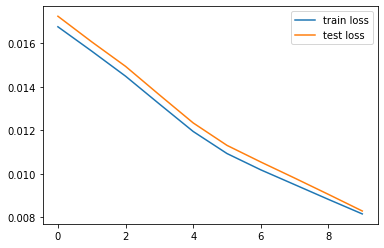

In [349]:
plt.plot(train_hist,label='train loss')
plt.plot(test_hist,label='test loss')
plt.legend( loc='upper right')
plt.show()


#Save the Model:

In [350]:
MODEL_PATH = '/content/drive/MyDrive/MachineLearing/torch/big_mart_sale/model.pth'
torch.save(model, MODEL_PATH)

##Load Model:

In [351]:
net = torch.load(MODEL_PATH)